The following code was completed from a shell provided by the IBM Data Science Capstone class.  It was ran on a specialized lab enviornment to accomodate Plotly.  Screen Shots are included of the final project.

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()
sites=spacex_df['Launch Site'].unique()
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                    options=[ {'label': i, 'value': i} for i in sites],
                                        value='All locations',
                                        placeholder="Select a Launch Site here",
                                        searchable=True),
                                html.Br(),
                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site

                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                    min=0, max=10000, step=1000,
                                    marks={0: '0 kg',
                                    1000: '1000 kg',
                                    2000: '2000 kg',
                                    3000: '3000 kg',
                                    4000: '4000 kg',
                                    5000: '5000 kg',
                                    6000: '7000 kg',
                                    7000: '7000 kg',
                                    8000: '8000 kg',
                                    9000: '9000 kg',
                                    10000: '10000 kg',},
                                    value=[min_payload, max_payload]),
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    if entered_site == 'All locations':
        fig = px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches By Site')
        return fig
    else:
        df=spacex_df[spacex_df['Launch Site']==entered_site].groupby(['Launch Site', 'class']).size().reset_index(name='class count')
        fig = px.pie(df, values='class count', 
        names='class', 
        title='Total Success Launches for site '+entered_site)
        return fig
        

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), 
              Input(component_id='payload-slider', component_property='value')])
def get_scatter_plot(entered_site,slider):
    bottom,top=(slider[0],slider[1])
    df2=spacex_df[spacex_df['Payload Mass (kg)'].between(bottom,top)]
    #df2=spacex_df
    if entered_site == 'All locations':
        fig = px.scatter(df2, x='Payload Mass (kg)', y='class', 
        color="Booster Version Category", title='Correlation between Payload and Success at all sites')
        return fig
    else:
        df3=df2[df2['Launch Site']==entered_site]
        fig=px.scatter(df3,x='Payload Mass (kg)', y='class', 
        color="Booster Version Category",
        title='Correlation between Payload and Success at '+entered_site)
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()


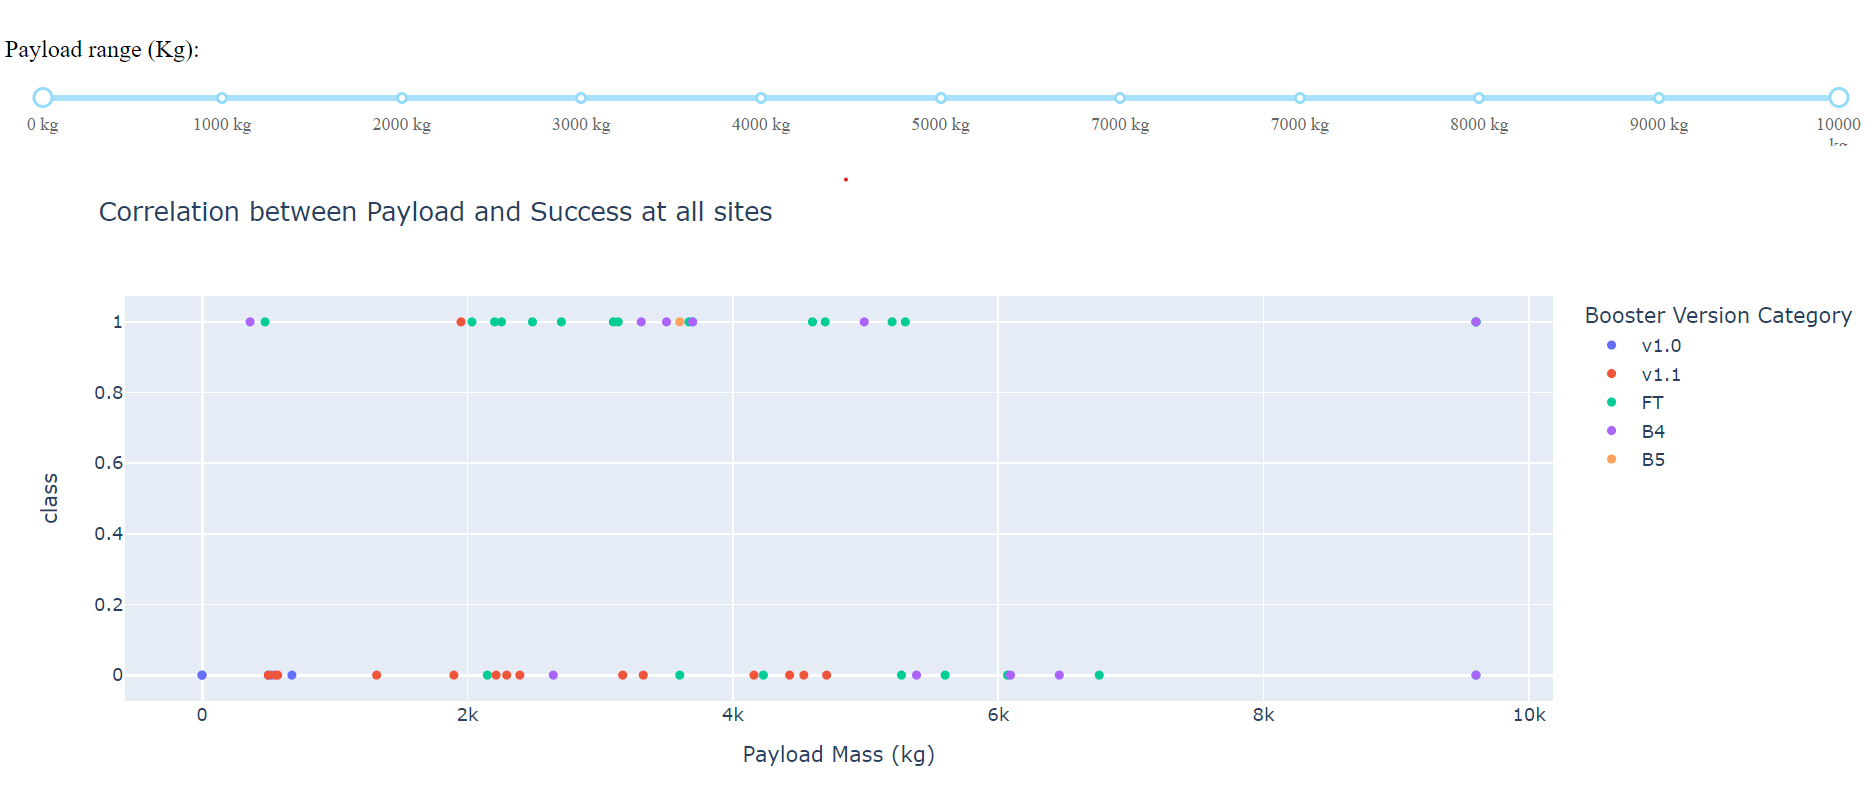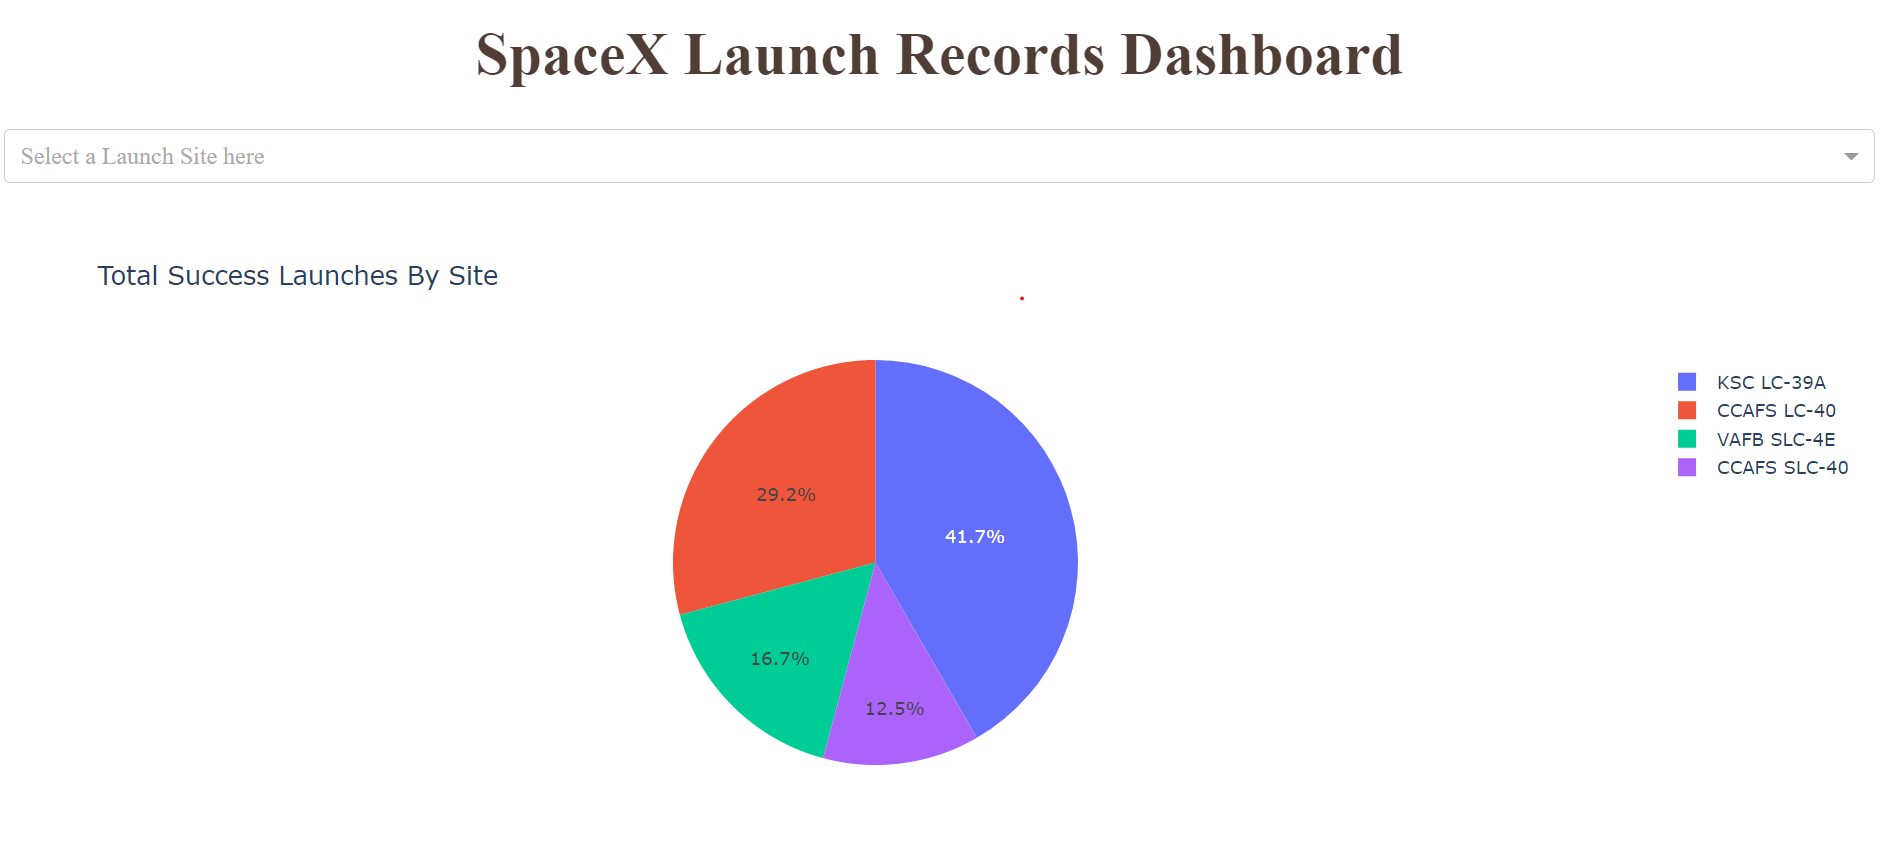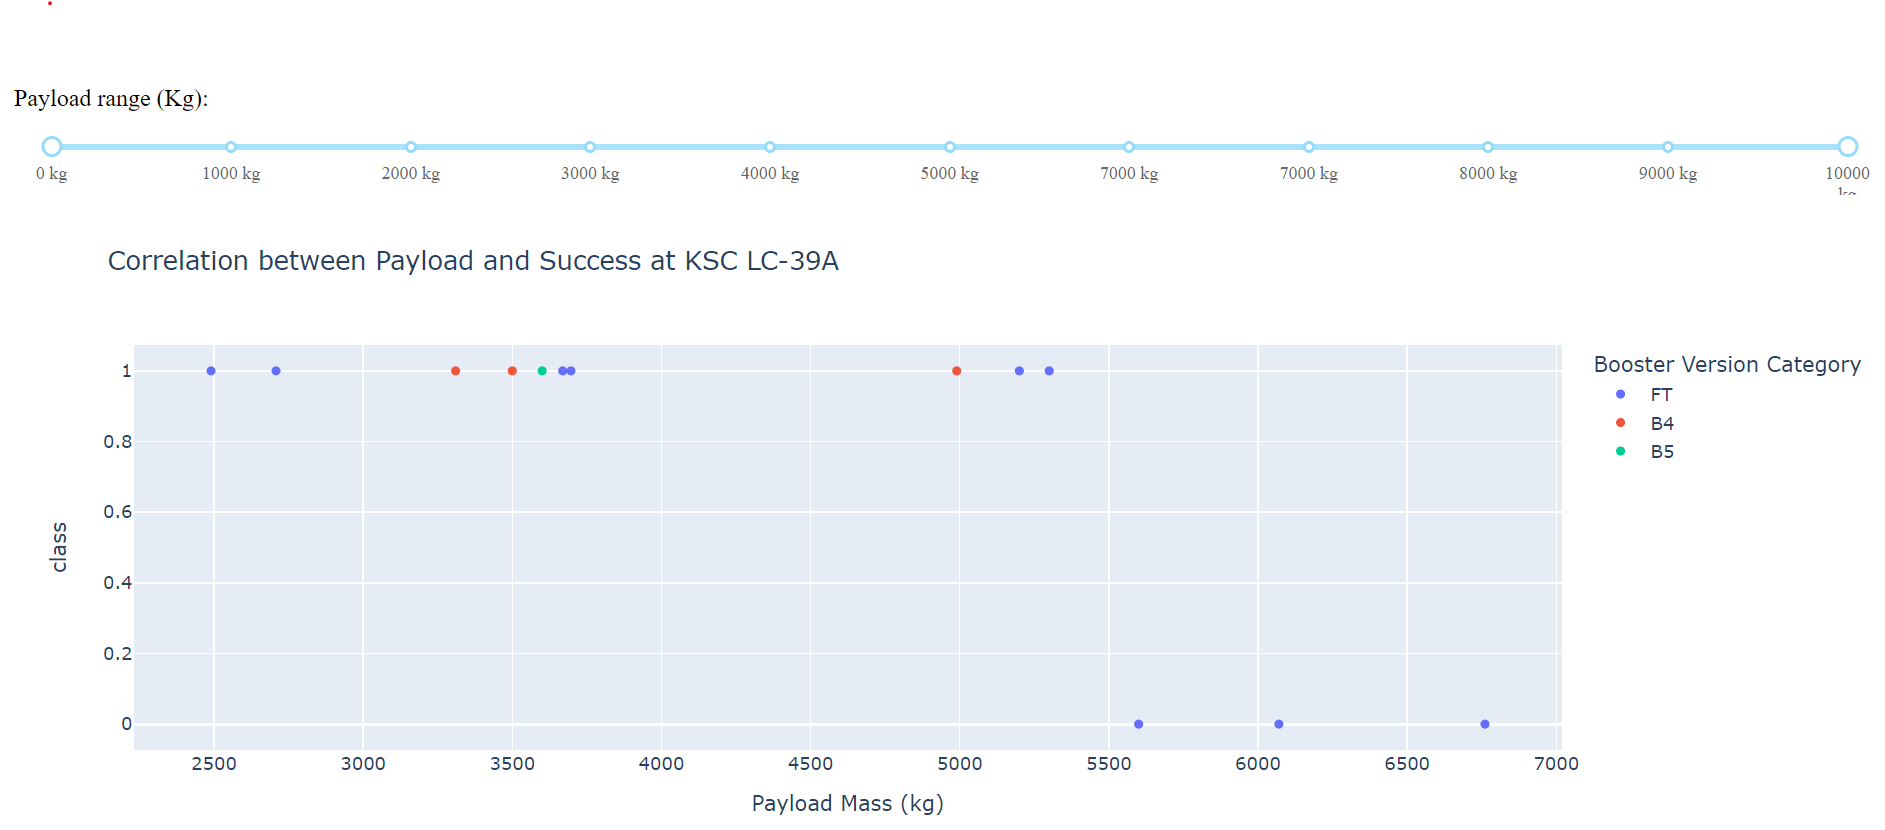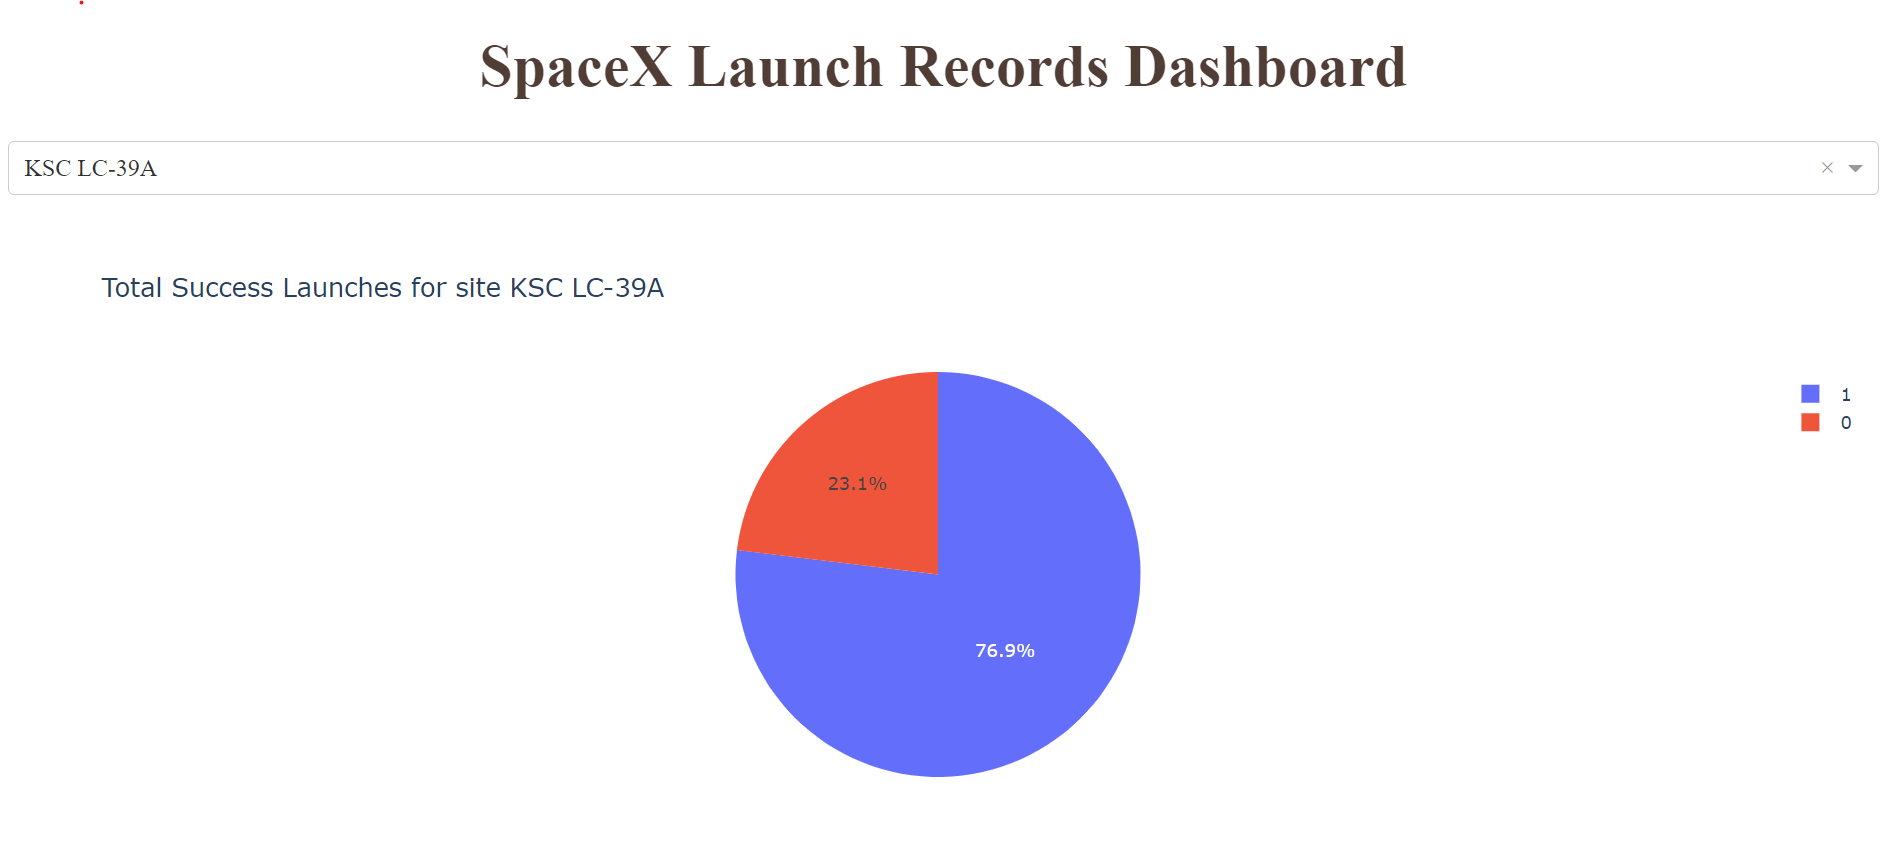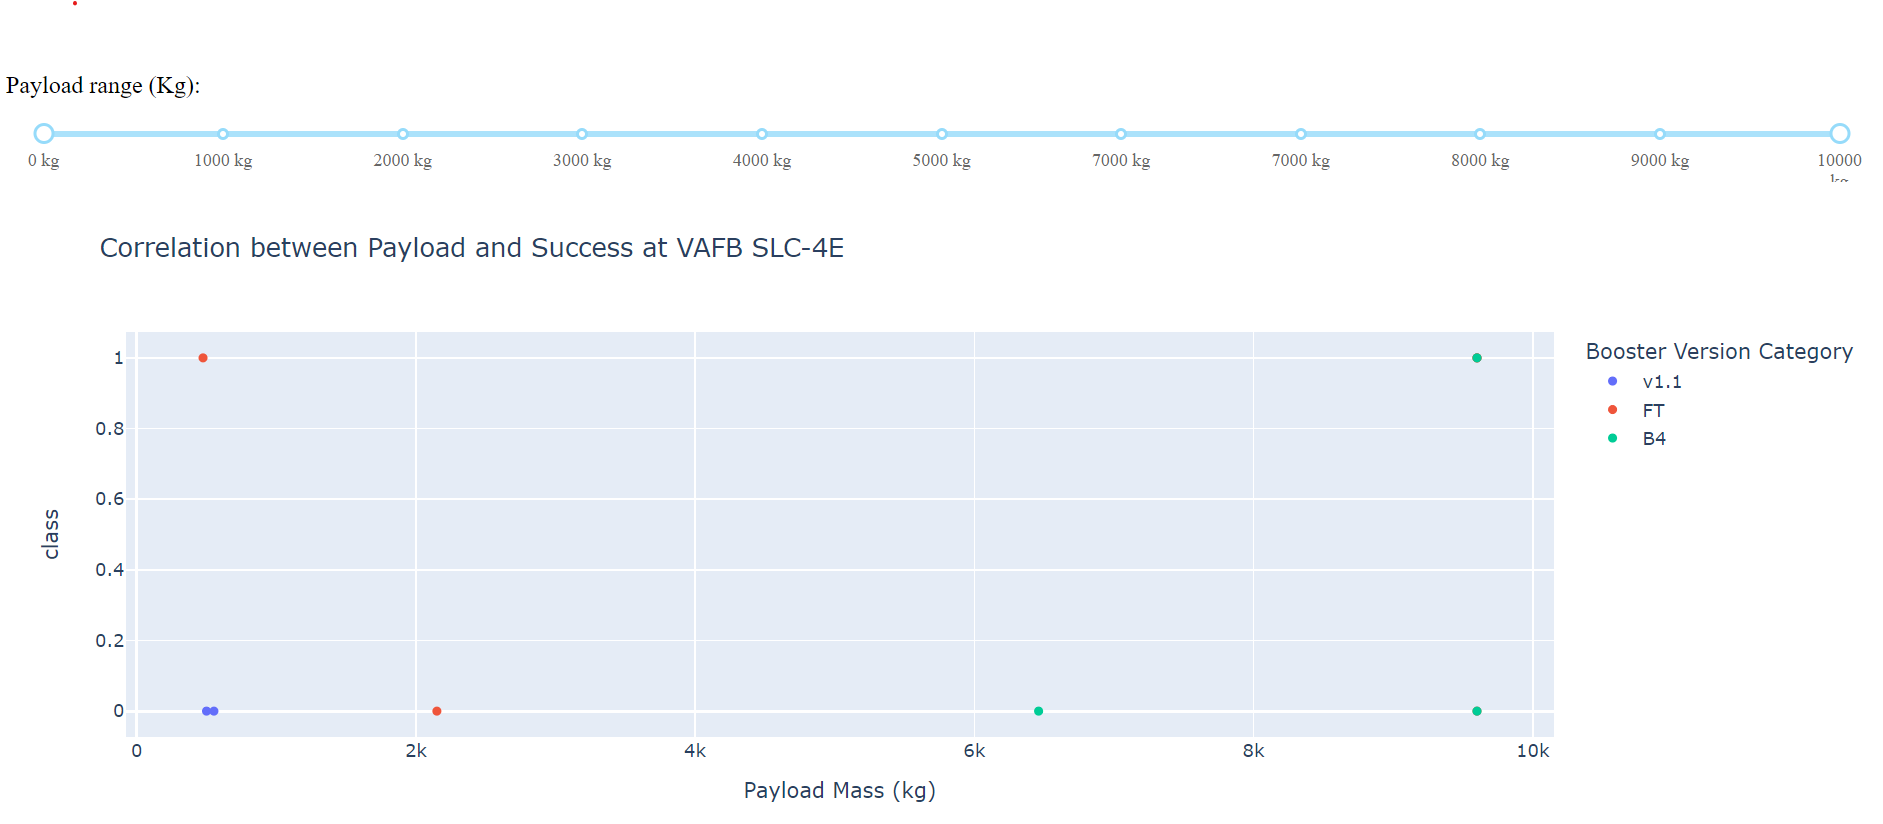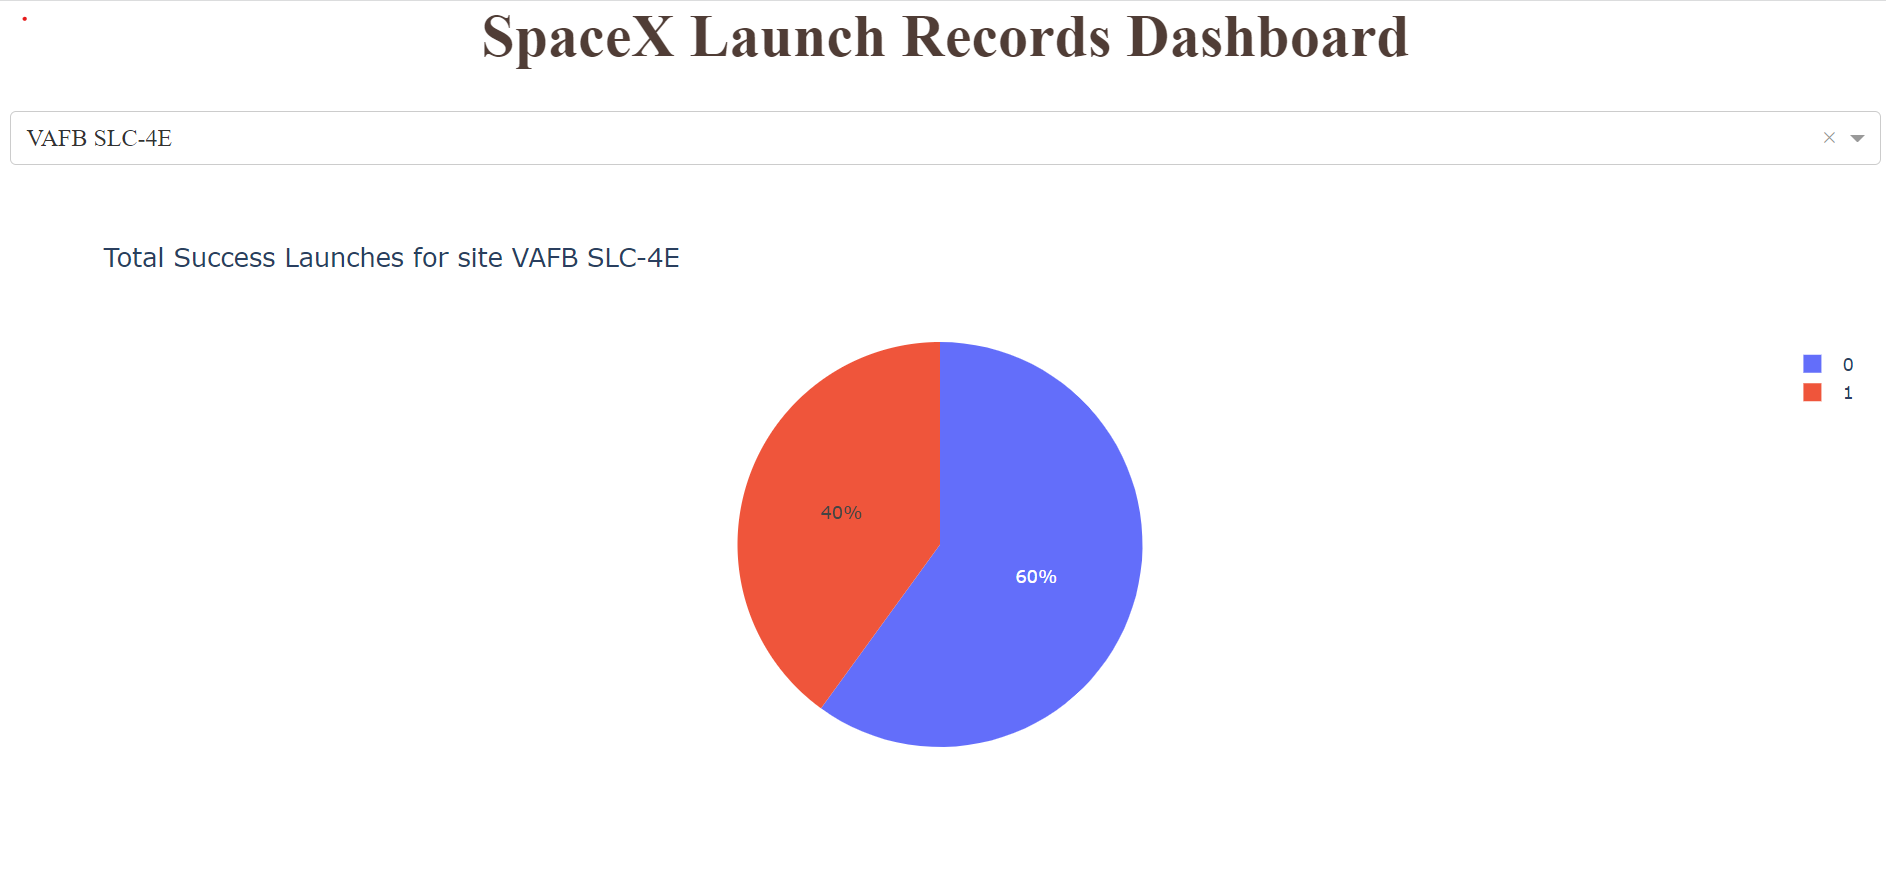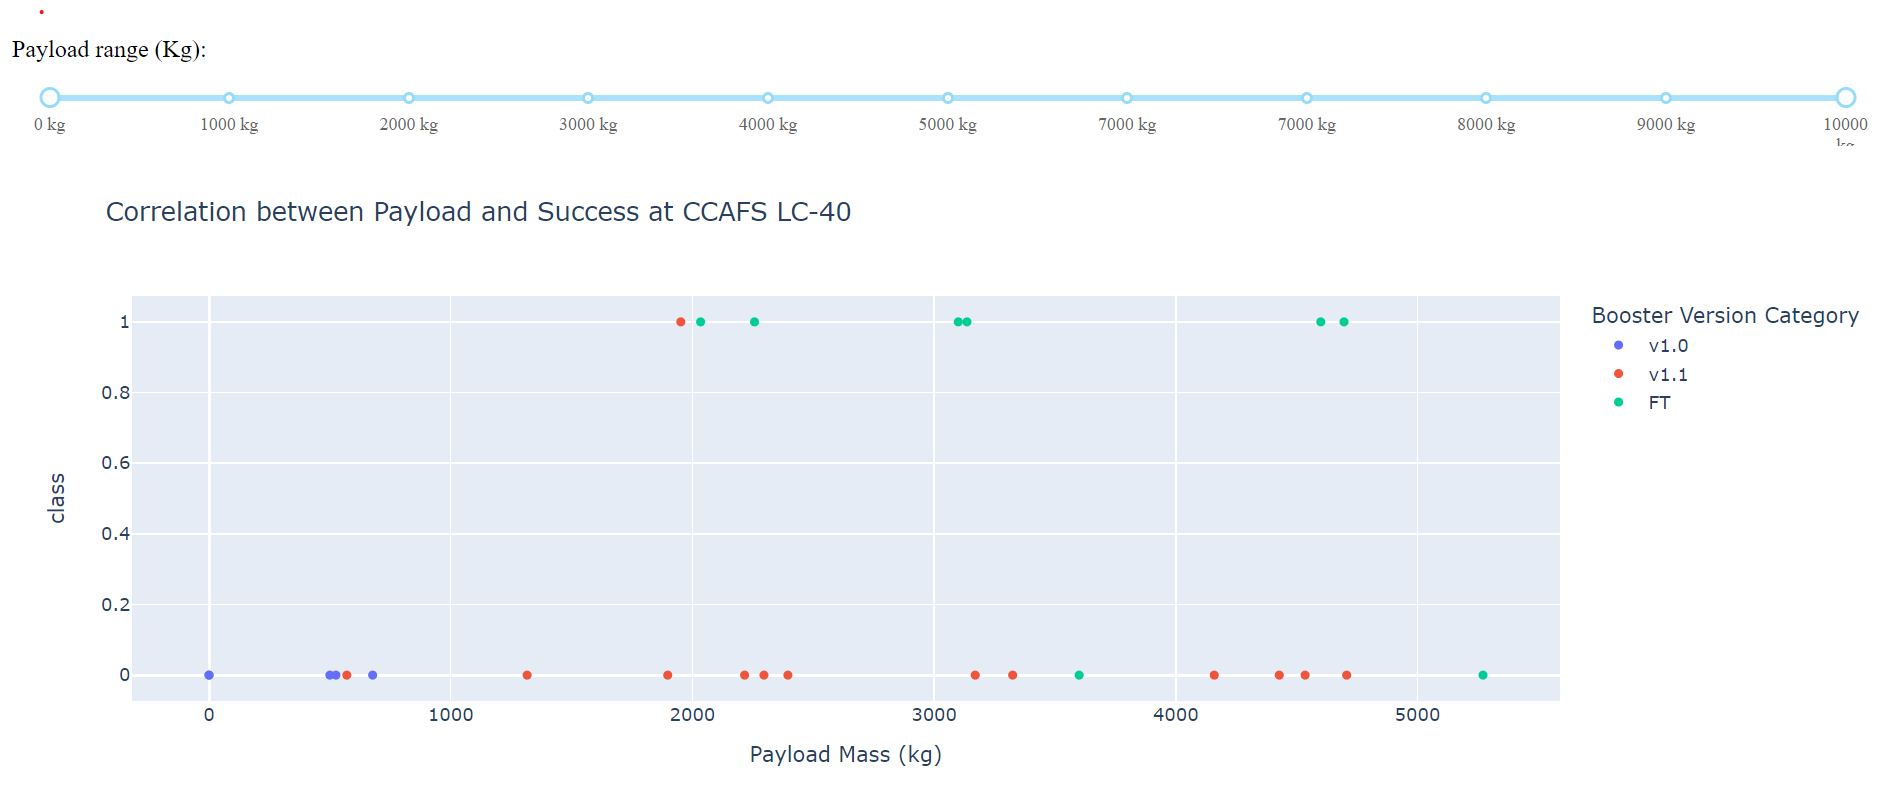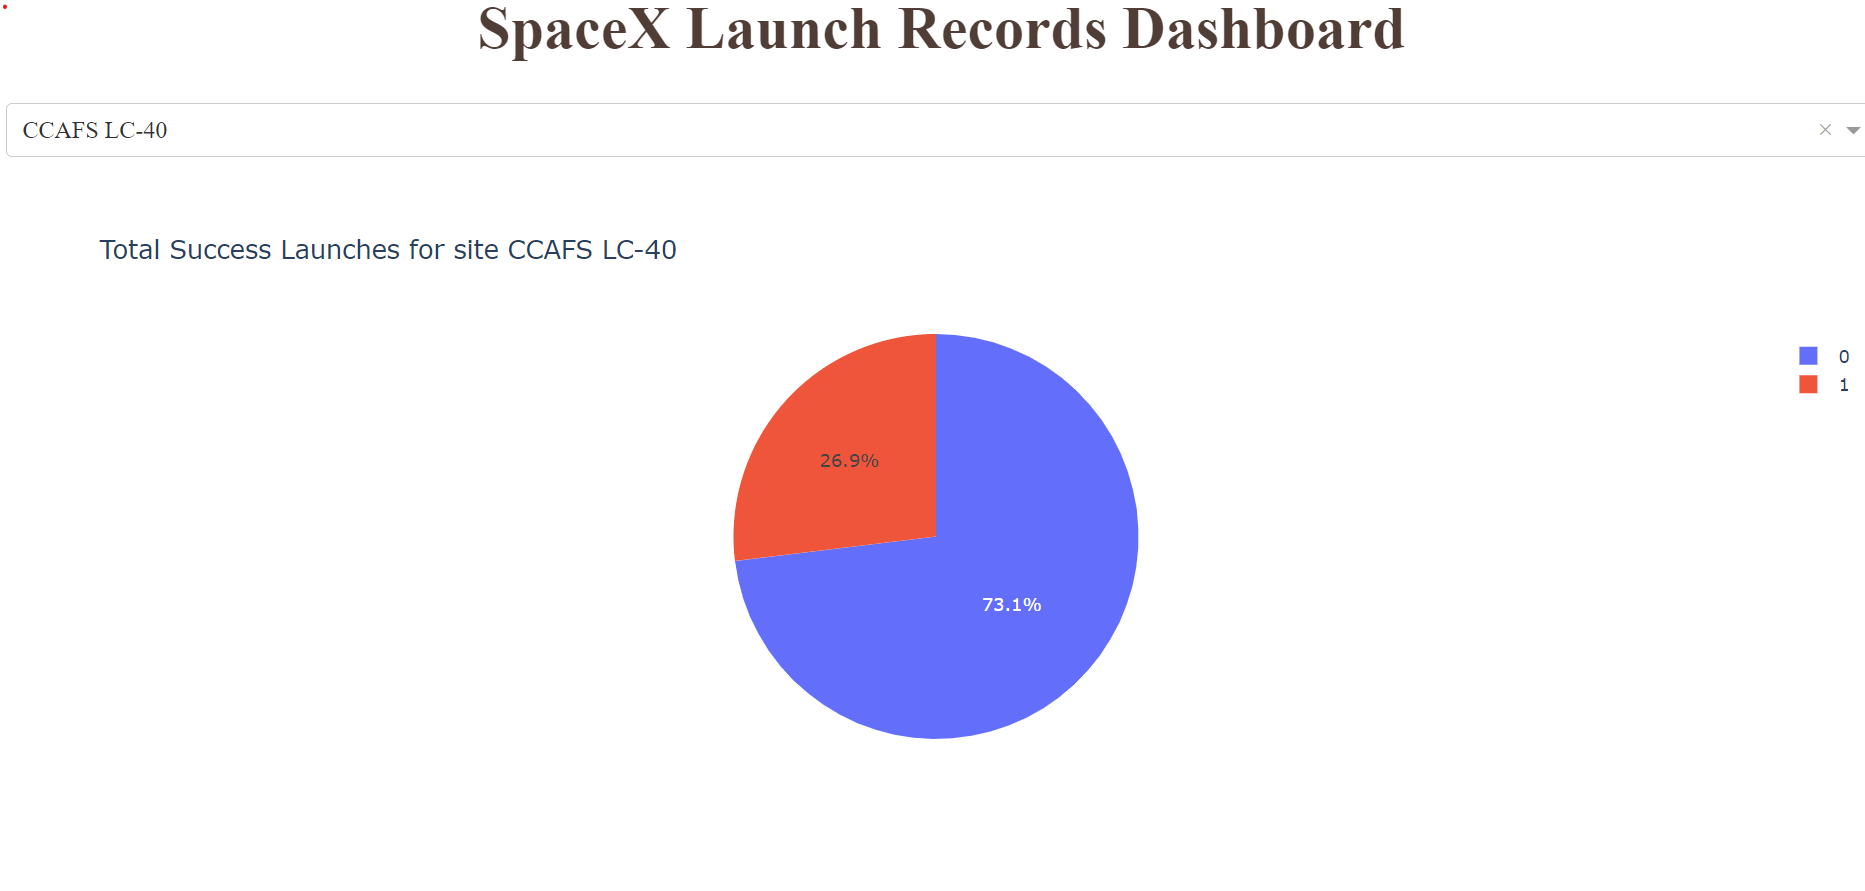

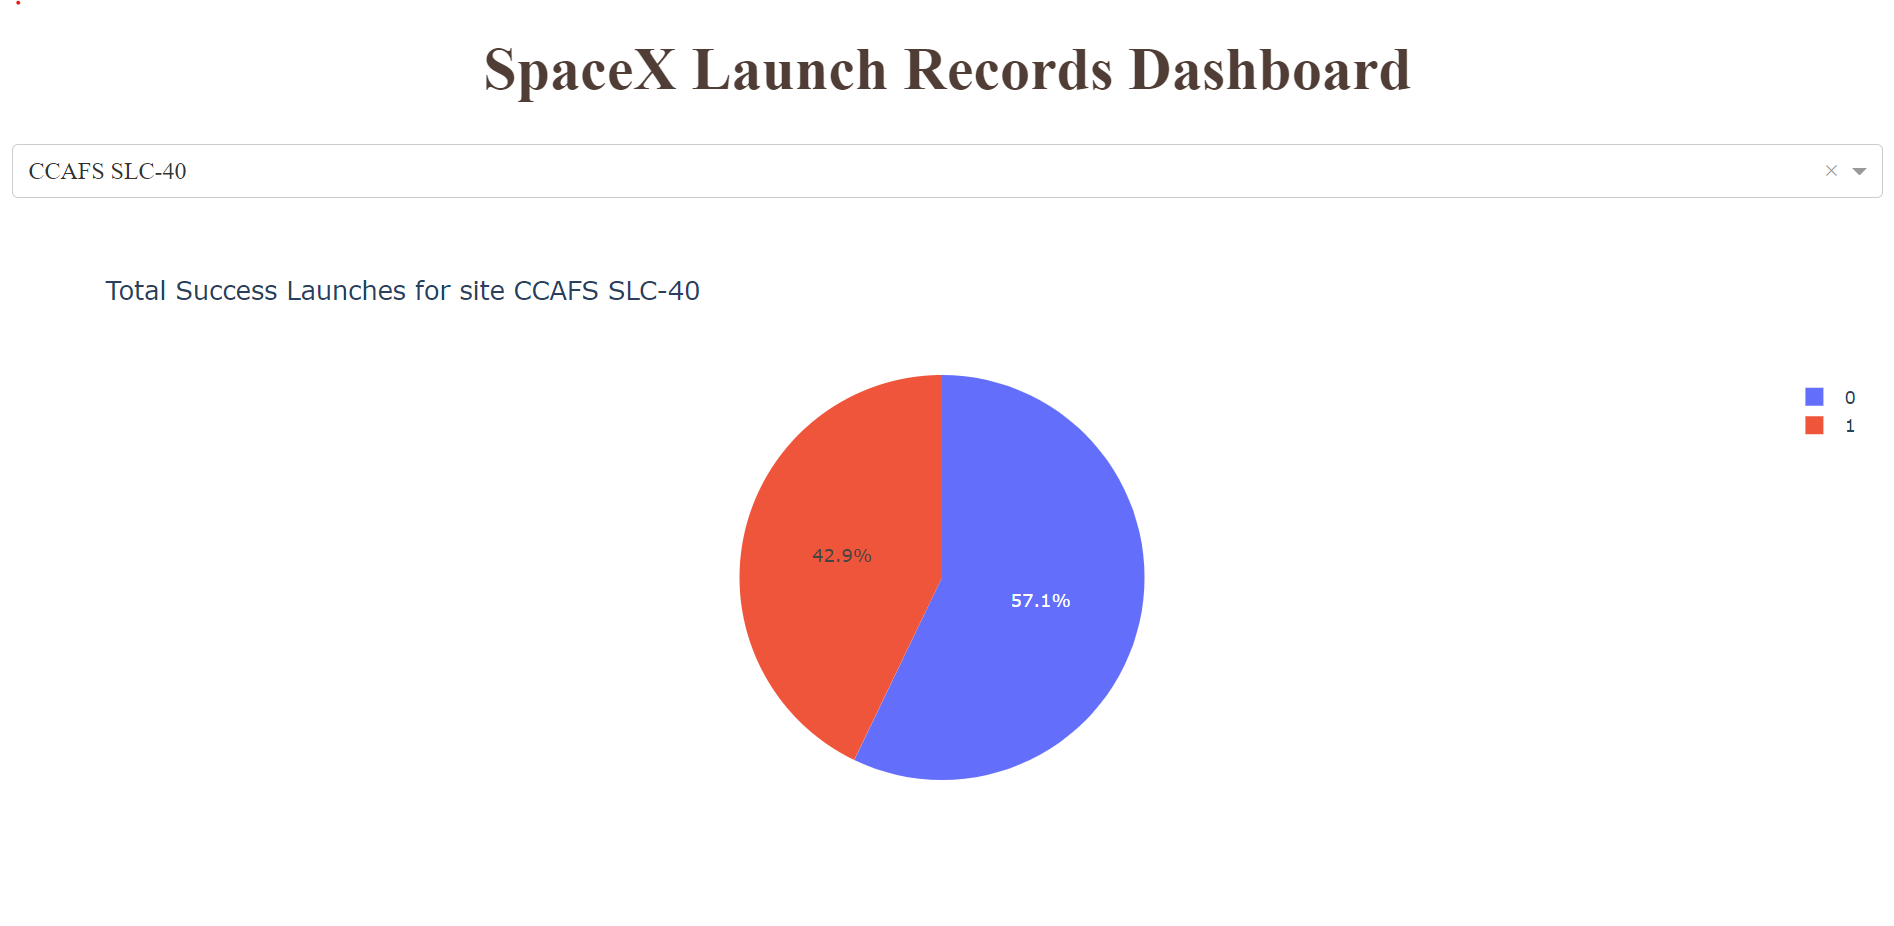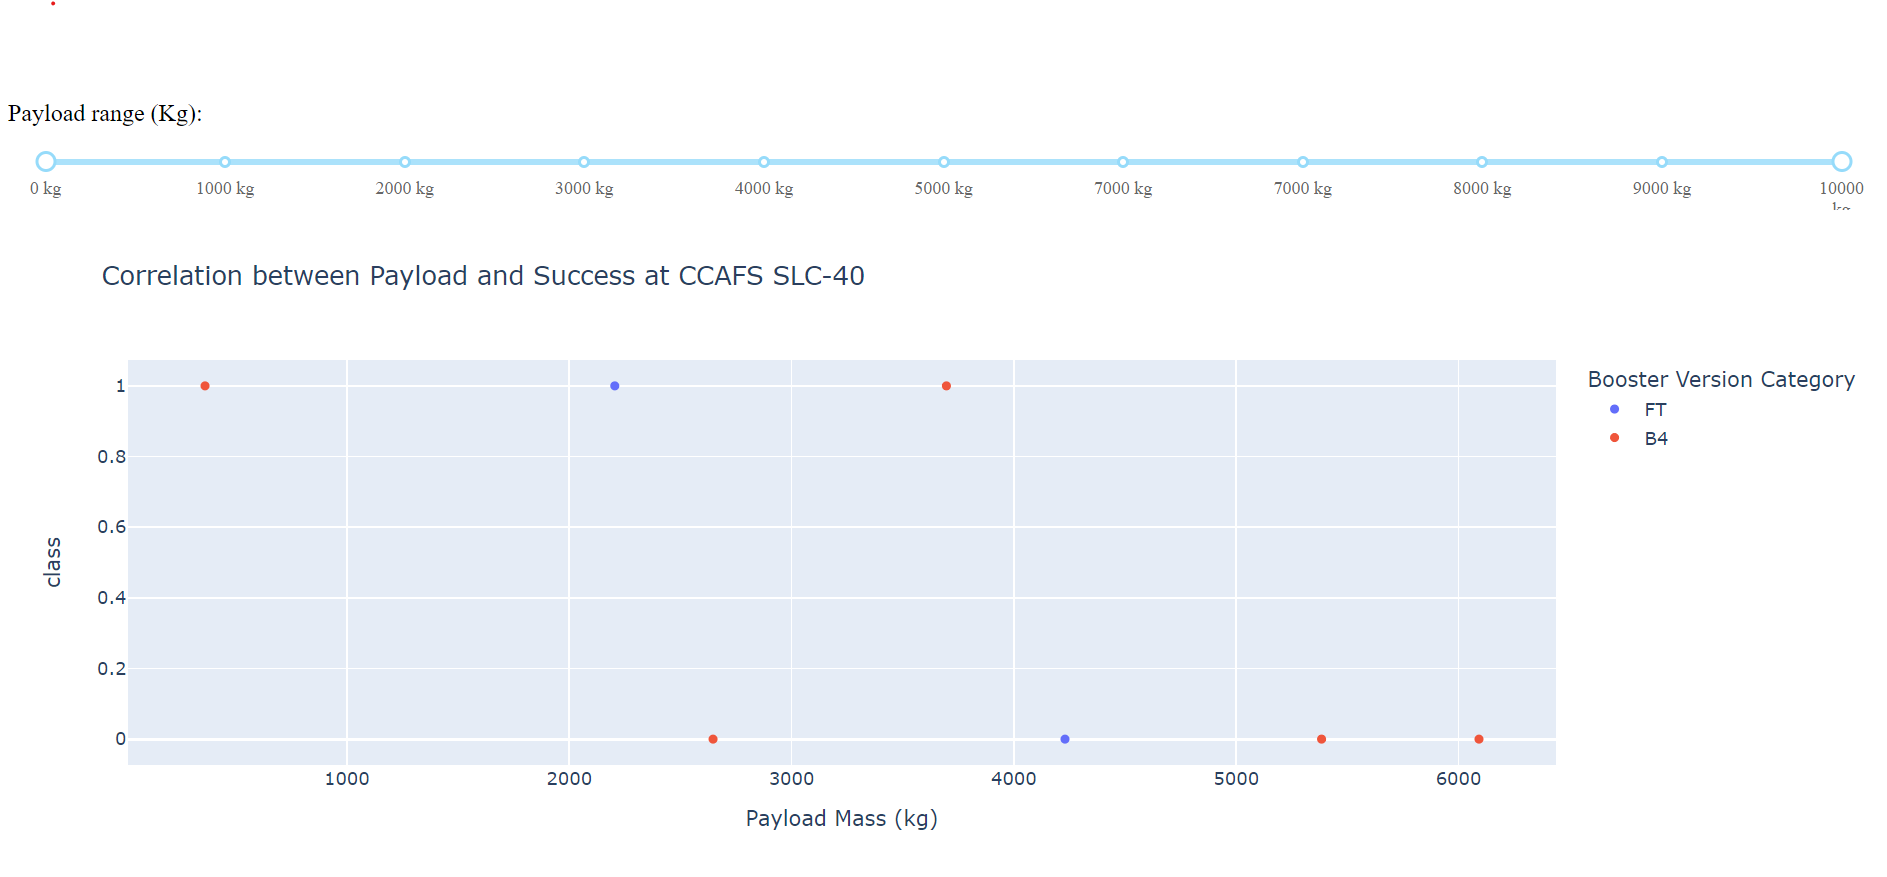